## Income Classifier project

In this notebook, we are trying to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost algorithm.

link of dataset is here: http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [2]:
train_set = pd.read_csv('Income_classifier_train_set.csv')

In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']


In [4]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test_set = pd.read_csv('adult.csv',skiprows=1,header=None)

In [6]:
test_set.columns = col_labels

In [7]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
train_set.shape

(32561, 15)

In [9]:
test_set.shape

(16281, 15)

In [5]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
train_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
#one-time operation no need to re-execute
#train_set.to_csv('Income_classifier_train_set.csv',header=True,index=False)

In the train set we can see there quite a few object columns, we need to check their values and do the needful data pre-processing.

the columns containing string values are below:
    **workclass,
    education,
    marital_status,
    occupation,
    relationship,
    race,
    sex,
    native_country,
    wage_class**

In [8]:
train_set['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
train_set['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
# Making sure that the data doesn't contain unecessary spaces
train_set=train_set.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [11]:
# data doesn't have any unnecessary spaces
train_set['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [32]:
train_set['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [36]:
train_set[train_set['workclass']=='Federal-gov'].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,960,960,960,960,960,960,960,960,960
unique,1,14,7,13,6,5,2,24,2
top,Federal-gov,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,<=50K
freq,960,263,471,317,429,721,645,903,589


also from the 'workclass' column it seems this dataset contains missing values denoted by '?', so we will replace them with NaN.

In [12]:
# we are replacing ? with NaN for them to be imputed down the line.
train_set.replace('?',np.NaN,inplace=True)

In [13]:
train_set.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [14]:
# checking for the columns containing missing values
cols=train_set.columns
mc=[]
a=train_set.isna().sum()
#print(type(a))
for i in range(len(a)):
    if a[i]>0:
        mc.append(cols[i])
        

In [15]:
mc

['workclass', 'occupation', 'native_country']

In [16]:
# percentage of missing values present in the dataset
train_set.isna().mean()

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    0.017905
wage_class        0.000000
dtype: float64

In [27]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
# categorical imputer substitutes null values with the most frequent value in that column.
# Importing the categorical imputer
#from sklearn_pandas import CategoricalImputer
#imputer = CategoricalImputer()

ModuleNotFoundError: No module named 'sklearn_pandas'

In [17]:
#substitutes null values with the most frequent value in that column.
for i in mc:
    x = train_set[i].mode()[0]
    train_set[i].fillna(x,inplace=True)

In [18]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [19]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


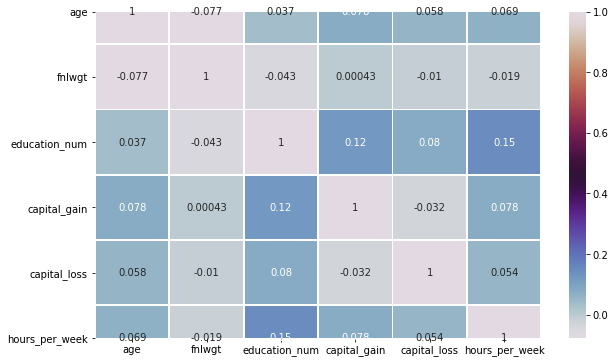

In [21]:
#Next we should find for any correlation among the columns

corr = train_set.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,linewidths=0.8,cmap='twilight')

From the co-relation plot or heatmap it's clear none of the columns have multi-colinearity among themeselves.

In [22]:
train_set['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [23]:
train_set['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [24]:
train_set['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [25]:
train_set['education_num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [26]:
train_set[['education','education_num']].head(10)

,education,education_num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [29]:
train_set[train_set['education']=='1st-4th'].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
160,68,Private,38317,1st-4th,2,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,20,United-States,<=50K
221,64,Private,187656,1st-4th,2,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
416,52,Private,190762,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
463,50,Private,193374,1st-4th,2,Married-spouse-absent,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
486,63,Private,401531,1st-4th,2,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,<=50K


In [28]:
train_set[train_set['education']=='5th-6th'].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
56,46,Private,216666,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
195,23,Private,197387,5th-6th,3,Married-civ-spouse,Transport-moving,Other-relative,White,Male,0,0,40,Mexico,<=50K
317,22,Private,399087,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Other-relative,White,Female,0,0,40,Mexico,<=50K
335,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,White,Male,0,0,48,Mexico,<=50K
381,46,Private,214955,5th-6th,3,Divorced,Craft-repair,Not-in-family,White,Female,0,2339,45,United-States,<=50K


In [31]:
train_set[train_set['education']=='7th-8th'].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,646,646,646,646,646,646,646,646,646
unique,8,1,6,13,6,5,2,27,2
top,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,496,646,359,116,333,553,486,518,606


In [30]:
train_set[train_set['education']=='Prof-school'].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
111,38,Private,65324,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
234,28,Private,76714,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,55,United-States,>50K
250,41,Private,112763,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
286,41,Private,220531,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [31]:
train_set[train_set['education_num']==8].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
415,35,Private,92440,12th,8,Divorced,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,>50K
484,52,Private,271749,12th,8,Never-married,Prof-specialty,Other-relative,Black,Male,594,0,40,United-States,<=50K
535,39,Local-gov,207853,12th,8,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,<=50K
576,18,Private,165532,12th,8,Never-married,Prof-specialty,Own-child,White,Male,0,0,25,United-States,<=50K
660,44,Self-emp-not-inc,335183,12th,8,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,>50K


Since we can see that there is already a mapping between education and education_num, so we are dropping the column education from the given dataset.

In [32]:
train_set.drop('education',axis=1,inplace=True)

In [33]:
train_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
train_set.shape

(32561, 14)

In [35]:
train_set['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [36]:
train_set['native_country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

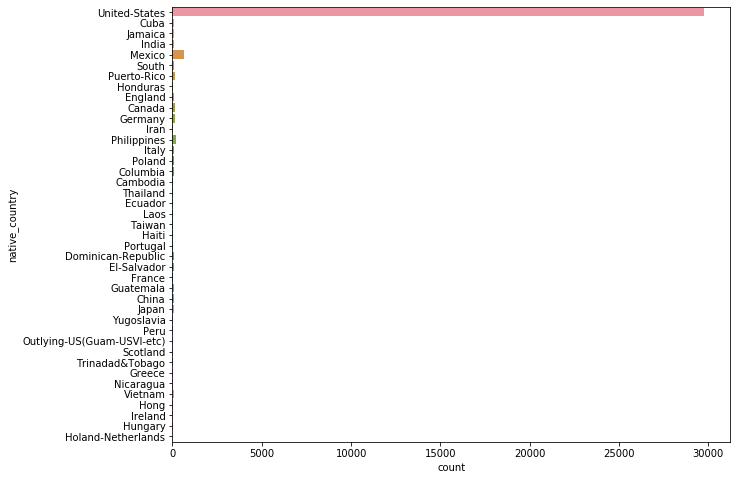

In [37]:
#exploring different categories in native_country
plt.figure(figsize=(10,8))
sns.countplot(y='native_country', data=train_set)
plt.show()

In [38]:
def modify_native_country(x):
    if (x=='United-States' or x=='Mexico' or x == 'Philippines' or x == 'Germany' or x=='Canada'):
        return x
    else:
        return 'Others'

In [39]:
#Applying the above function on the native_country column
train_set['native_country'] = train_set['native_country'].map(modify_native_country)

In [40]:
train_set['native_country'].value_counts()

United-States    29753
Others            1709
Mexico             643
Philippines        198
Germany            137
Canada             121
Name: native_country, dtype: int64

In [41]:
train_set[train_set['native_country'] == 'United-States'].wage_class.value_counts()

<=50K    22436
>50K      7317
Name: wage_class, dtype: int64

In [42]:
train_set['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [43]:
#here we have found there is no junk values in 'marital_status' column, hence no need to remove any values
train_set['marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [42]:
train_set[train_set['marital_status']=='Married-spouse-absent'].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,418,418,418,418,418,418,418,418,418
unique,7,16,1,13,4,5,2,30,2
top,Private,HS-grad,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,United-States,<=50K
freq,331,121,418,76,211,291,213,274,384


In [41]:
train_set[train_set['marital_status']=='Married-AF-spouse'].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,23,23,23,23,23,23,23,23,23
unique,4,5,1,9,4,2,2,1,2
top,Private,HS-grad,Married-AF-spouse,Adm-clerical,Wife,White,Female,United-States,<=50K
freq,17,13,23,5,12,22,14,23,13


In [44]:
train_set['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [45]:
train_set['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [37]:
#No junk values
train_set['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [38]:
train_set['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [47]:
#No Junk values
train_set['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [43]:
train_set['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [44]:
train_set[train_set['race']=='Asian-Pac-Islander'].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,1039,1039,1039,1039,1039,1039,1039,1039,1039
unique,7,16,6,13,6,1,2,25,2
top,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,United-States,<=50K
freq,778,289,508,251,410,1039,693,375,763


In [45]:
train_set[train_set['race']=='Amer-Indian-Eskimo'].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,311,311,311,311,311,311,311,311,311
unique,6,15,6,13,6,1,2,8,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,Amer-Indian-Eskimo,Male,United-States,<=50K
freq,215,119,116,58,92,311,192,296,275


In [48]:
#No junk values
train_set['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [49]:
df = train_set.copy()
df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Others,<=50K


In [50]:
df.tail()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [51]:
df['wage_class'].head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: wage_class, dtype: object

In [52]:
df['wage_class'] = df['wage_class'].apply(lambda x: 1 if x == '>50K' else 0)

In [53]:
df['wage_class'].head()

0    0
1    0
2    0
3    0
4    0
Name: wage_class, dtype: int64

Completed till 5/09/2020.

#### Outliers detection

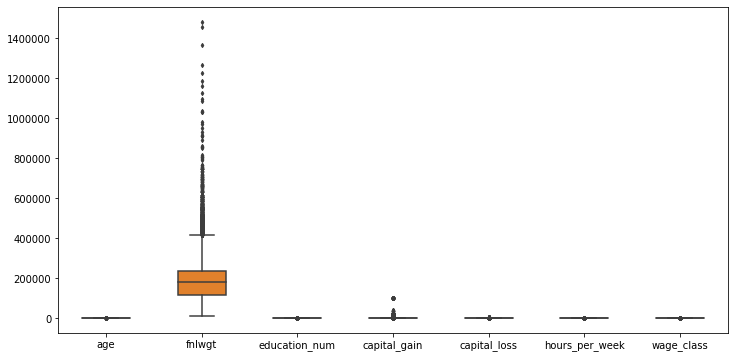

In [54]:
#Boxplot
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

Started today @1pm, 6/09/2020

In [55]:
df[['fnlwgt','wage_class']].head(10)

,fnlwgt,wage_class
0,77516,0
1,83311,0
2,215646,0
3,234721,0
4,338409,0
5,284582,0
6,160187,0
7,209642,1
8,45781,1
9,159449,1


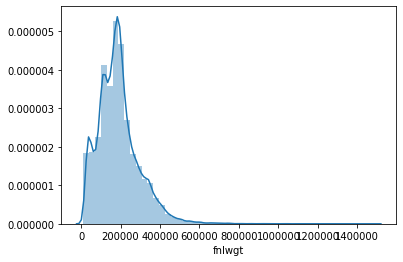

In [52]:
sns.distplot(df['fnlwgt'],bins=50)

In [56]:
# dropping this column since it doesn't have any direct relation with the label column
df.drop('fnlwgt',axis = 1, inplace=True)

In [57]:
df.shape

(32561, 13)

In [58]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Others,0


In [59]:
# copying all the numerical columns from the dataset into one single Dataframe which will be used for scaling
numerical_columns = df.select_dtypes(include='int64')

In [60]:
numerical_columns

,age,education_num,capital_gain,capital_loss,hours_per_week,wage_class
0,39,13,2174,0,40,0
1,50,13,0,0,13,0
2,38,9,0,0,40,0
3,53,7,0,0,40,0
4,28,13,0,0,40,0
...,...,...,...,...,...,...
32556,27,12,0,0,38,0
32557,40,9,0,0,40,1
32558,58,9,0,0,40,0
32559,22,9,0,0,20,0


In [61]:
# copying all the categorical columns from the dataset into one single dataset which we will use for encoding
cat_df = df.select_dtypes(include='object').copy()

In [62]:
cat_df.head()

,workclass,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Others


In [63]:
cat_df.describe(include='object')

,workclass,marital_status,occupation,relationship,race,sex,native_country
count,32561,32561,32561,32561,32561,32561,32561
unique,8,7,14,6,5,2,6
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,24532,14976,5983,13193,27816,21790,29753


Now we would need to change this categorical variables using one-hot encoding, before performing one-hot encoding, let us merge both the datasets and perform the one-hot encoding one at a time. Later we will split this data into train and test set using train_test_split.

In [64]:
#we will use the cat_df since it has all the categorical columns
for col in cat_df.columns:
    #x=cat_df[col].head(1)
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [65]:
cat_df.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Germany,native_country_Mexico,native_country_Others,native_country_Philippines,native_country_United-States
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [66]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler=StandardScaler()
# scaling the numerical columns
scaled_data=scaler.fit_transform(numerical_columns.drop('wage_class',axis=1))

In [67]:
numerical_columns.columns[:-1]

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [69]:
scaled_data_df = pd.DataFrame(data=scaled_data,columns=numerical_columns.columns[:-1])

In [70]:
scaled_data_df.head()

,age,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.134739,-0.145920,-0.21666,-0.035429


In [83]:
#scaled_data_df.drop('fnlwgt',axis=1,inplace=True)

In [71]:
X = pd.concat([scaled_data_df,cat_df],axis=1)

In [72]:
X.shape

(32561, 46)

In [73]:
X.columns

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_Local-gov', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital_status_Married-AF-spouse',
       'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relati

In [74]:
X.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Germany,native_country_Mexico,native_country_Others,native_country_Philippines,native_country_United-States
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
3,1.057047,-1.197459,-0.145920,-0.21666,-0.035429,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,-0.775768,1.134739,-0.145920,-0.21666,-0.035429,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [75]:
y = numerical_columns['wage_class']

In [76]:
y.shape

(32561,)

In [77]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: wage_class, dtype: int64

In [78]:
y.unique()

array([0, 1], dtype=int64)

In [79]:
y.value_counts()

0    24720
1     7841
Name: wage_class, dtype: int64

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

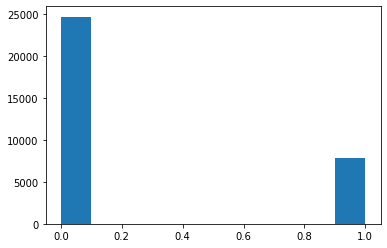

In [80]:
# plotting the target column to check whether it's an imbalanced dataset or not (necessary step for classification problem)
plt.hist(y)

from the above plot(the distribution of the target column), it is clear that the people with less than 50K annual income are more in number than the people with an annual income greaterthan 50K, Hence it is an **Imbalanced Dataset**, we would need to introduce some random sampling to make it balanced.

In [81]:
#Now doing the necessary imports for xgboost algorithm.
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import RandomOverSampler
#from sklearn.preprocessing import StandardScaler #Scaling the dataset
from sklearn.model_selection import train_test_split #split the data into train and test set

In [82]:
#testing for Random-forest
#We would split our data in train and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [94]:
x_train.shape

(22792, 46)

In [83]:
y_train.value_counts()

0    17265
1     5527
Name: wage_class, dtype: int64

###### Using class_weights on random_forest model for initial prediction with imbalanced dataset.

**Important tip:** One of the techniques for handling imbalanced dataset is appying Random-forest algorithm with the class_weights parameter, what it does is increasing the importance of one class compare to the other while builing the model based on the training dataset

In [84]:
class_weights = dict({0:1,1:3})

In [85]:
clf_random_forest = RandomForestClassifier(class_weight=class_weights,random_state=200)

In [86]:
clf_random_forest.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, random_state=200)

In [87]:
# cheking initial testing accuracy(no hyperparameter tuning)
y_pred_rf = clf_random_forest.predict(x_test)
#predictions = [round(value) for value in y_pred]
accuracy_rf = accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.8482956290306071

In [88]:
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[6814  641]
 [ 841 1473]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7455
           1       0.70      0.64      0.67      2314

    accuracy                           0.85      9769
   macro avg       0.79      0.78      0.78      9769
weighted avg       0.84      0.85      0.85      9769



In [92]:
# making the dataset balanced with the help of random over sampler
#rdsmple = RandomOverSampler()
#x_sampled,y_sampled  = rdsmple.fit_sample(X,y)

**Remember always apply over-sampler or under-sampler or SMOTE techniques after completing train_test_split, do not apply sampling on full dataset, then model will also not going to be tested on the real data instead it might get tested on some synthetic/random data.So a rule of thumb is first perform train_test_split,the apply sampling techniques on training dataset and create model with that training data,then test the performance of the model on the original test dataset.**

In [89]:
# making the training dataset balanced with the help of random over sampler
rdsmple = RandomOverSampler(0.65)
#appyling the random-over sampler on the train dataset
x_sampled,y_sampled  = rdsmple.fit_sample(x_train,y_train)

C:\Users\Supratik\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.65 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


(array([17265.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11222.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

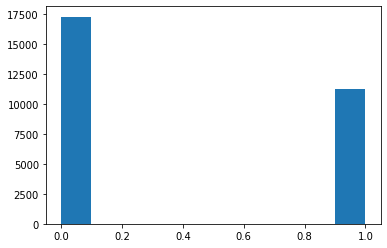

In [90]:
# again plotting the target column
plt.hist(y_sampled)

Now it looks balanced.

In [95]:
x_sampled.shape

(28487, 46)

In [96]:
y_sampled.shape

(28487,)

In [97]:
y_sampled.value_counts()

0    17265
1    11222
Name: wage_class, dtype: int64

#### Model Building

##### XGBoost

In [133]:
x_sampled.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Germany,native_country_Mexico,native_country_Others,native_country_Philippines,native_country_United-States
0,-0.335892,-0.420060,-0.145920,5.190905,-2.303143,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0.690484,-0.031360,0.895083,-0.216660,-0.035429,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,-1.142331,-0.031360,-0.145920,-0.216660,-0.845327,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,1.276984,-0.420060,-0.145920,-0.216660,-0.035429,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,-1.582206,-1.197459,-0.145920,-0.216660,-2.546112,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [98]:
#model without scaling the data
model1 = XGBClassifier(objective='binary:logistic')
model1.fit(x_sampled,y_sampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
# cheking training accuracy
y_pred = model1.predict(x_sampled)
predictions = [round(value) for value in y_pred]
accuracy_train = accuracy_score(y_sampled,predictions)
accuracy_train

0.8899498016639169

In [100]:
# cheking initial testing accuracy(no hyperparameter tuning)
y_pred = model1.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy_test = accuracy_score(y_test,predictions)
accuracy_test

0.8552564233800799

In [101]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6525  930]
 [ 484 1830]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7455
           1       0.66      0.79      0.72      2314

    accuracy                           0.86      9769
   macro avg       0.80      0.83      0.81      9769
weighted avg       0.87      0.86      0.86      9769



#### Hyperparameter tuning

In [102]:
# Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

##### RandomSearchCV

In [103]:
random_param={
    'learning_rate':[1,0.5,0.3,0.1,0.01,0.001],
    'max_depth': [3,5,9,14,20],
    'n_estimators':[50,100,200,300]
    }

In [104]:
random_search = RandomizedSearchCV(estimator=model1,param_distributions=random_param,n_iter=100,cv=3,verbose=5,n_jobs=-1)

In [105]:
random_search.fit(x_sampled,y_sampled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 36.1min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                       

In [106]:
random_search.best_params_

{'n_estimators': 300, 'max_depth': 20, 'learning_rate': 0.1}

In [107]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### GridSearch CV

In [108]:
param_grid = {
    'learning_rate':[random_search.best_params_['learning_rate']-0.10,
                    random_search.best_params_['learning_rate'],
                    random_search.best_params_['learning_rate']+0.10],
    'max_depth':[random_search.best_params_['max_depth']],
    'n_estimators':[random_search.best_params_['n_estimators']-50,
                   random_search.best_params_['n_estimators'],
                   random_search.best_params_['n_estimators']+50]
}
print(param_grid)

{'learning_rate': [0.0, 0.1, 0.2], 'max_depth': [20], 'n_estimators': [250, 300, 350]}


In [109]:
grid_search = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic'),param_grid=param_grid,cv=5,verbose=3)
grid_search.fit(x_sampled,y_sampled)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] learning_rate=0.0, max_depth=20, n_estimators=250 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.0, max_depth=20, n_estimators=250, score=0.606, total=  29.3s
[CV] learning_rate=0.0, max_depth=20, n_estimators=250 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.2s remaining:    0.0s


[CV]  learning_rate=0.0, max_depth=20, n_estimators=250, score=0.606, total=  27.4s
[CV] learning_rate=0.0, max_depth=20, n_estimators=250 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   56.5s remaining:    0.0s


[CV]  learning_rate=0.0, max_depth=20, n_estimators=250, score=0.606, total=  27.5s
[CV] learning_rate=0.0, max_depth=20, n_estimators=250 ...............
[CV]  learning_rate=0.0, max_depth=20, n_estimators=250, score=0.606, total=  26.3s
[CV] learning_rate=0.0, max_depth=20, n_estimators=250 ...............
[CV]  learning_rate=0.0, max_depth=20, n_estimators=250, score=0.606, total=  26.9s
[CV] learning_rate=0.0, max_depth=20, n_estimators=300 ...............
[CV]  learning_rate=0.0, max_depth=20, n_estimators=300, score=0.606, total=  33.3s
[CV] learning_rate=0.0, max_depth=20, n_estimators=300 ...............
[CV]  learning_rate=0.0, max_depth=20, n_estimators=300, score=0.606, total=  32.8s
[CV] learning_rate=0.0, max_depth=20, n_estimators=300 ...............
[CV]  learning_rate=0.0, max_depth=20, n_estimators=300, score=0.606, total=  32.7s
[CV] learning_rate=0.0, max_depth=20, n_estimators=300 ...............
[CV]  learning_rate=0.0, max_depth=20, n_estimators=300, score=0.606, 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 23.6min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [110]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 350}

In [111]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
# Create new model using the above parameters achieved from hyper-parameter tuning
new_model=XGBClassifier(learning_rate = 0.1,max_depth= 20, n_estimators= 350)
new_model.fit(x_sampled,y_sampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
# Create new model using the same parameters
#new_model=XGBClassifier(learning_rate = 0.4,max_depth= 14, n_estimators= 350)
#new_model.fit(x_sampled,y_sampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Checking performance of hypertuned model.

In [114]:
new_model.score(x_test,y_test)

0.8477838059166752

In [113]:
#cheking final testing accuracy after performing hyperparameter tuning
y_pred_new = new_model.predict(x_test)
#predictions = [round(value) for value in y_pred_new]
accuracy_test_new = accuracy_score(y_test,y_pred_new)
accuracy_test_new

0.8477838059166752

Hence the final accuracy after completing Hyperparameter tuning is near to **84.8%**

In [115]:
confusion_matrix(y_test,y_pred_new)

array([[6655,  800],
       [ 687, 1627]], dtype=int64)

In [116]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7455
           1       0.67      0.70      0.69      2314

    accuracy                           0.85      9769
   macro avg       0.79      0.80      0.79      9769
weighted avg       0.85      0.85      0.85      9769



##### Random-forest(applying on the over-sampled training dataset)

In [117]:
clf_random_forest = RandomForestClassifier(random_state=200)
#creating the model
clf_random_forest.fit(x_sampled,y_sampled)

RandomForestClassifier(random_state=200)

In [118]:
# cheking initial testing accuracy(no hyperparameter tuning,over-sampled data)
y_pred_rf = clf_random_forest.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print(accuracy_rf)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

0.8412324700583478
[[6670  785]
 [ 766 1548]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7455
           1       0.66      0.67      0.67      2314

    accuracy                           0.84      9769
   macro avg       0.78      0.78      0.78      9769
weighted avg       0.84      0.84      0.84      9769



##### Hyperparameter tuning on Random forest model

###### 1. Randomized Search CV

In [119]:
random_param = {
     "n_estimators" : [100,300,450,600,750],
    "max_depth" : [5,10,15,20,30],
    "min_samples_leaf" : [1, 2, 5],
    "criterion" : ['gini', 'entropy']
    #"max_features" : ['auto', 'log2']
}
print(random_param)

{'n_estimators': [100, 300, 450, 600, 750], 'max_depth': [5, 10, 15, 20, 30], 'min_samples_leaf': [1, 2, 5], 'criterion': ['gini', 'entropy']}


In [120]:
random_search = RandomizedSearchCV(estimator=clf_random_forest,param_distributions=random_param,n_iter=90,cv=3,verbose=7,n_jobs=-1)

In [121]:
random_search.fit(x_sampled,y_sampled)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 14.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=200),
                   n_iter=90, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 30],
                                        'min_samples_leaf': [1, 2, 5],
                                        'n_estimators': [100, 300, 450, 600,
                                                         750]},
                   verbose=7)

In [122]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 1,
 'max_depth': 30,
 'criterion': 'entropy'}

In [123]:
random_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=300,
                       random_state=200)

###### 2. Grid search CV

In [124]:
# creating parameters for grid search
grid_param = {
    "n_estimators" : [random_search.best_params_['n_estimators']-50,
                     random_search.best_params_['n_estimators'],
                     random_search.best_params_['n_estimators']+50],
    "max_depth" : [ random_search.best_params_['max_depth']-5,
                    random_search.best_params_['max_depth'],
                    random_search.best_params_['max_depth']+5],
    "min_samples_leaf" : [random_search.best_params_['min_samples_leaf'],
                         random_search.best_params_['min_samples_leaf']+2,
                         random_search.best_params_['min_samples_leaf']+4],
    #'max_features' : [random_search.best_params_['max_features']],
    "criterion" : ['gini', 'entropy']
}
print(grid_param)

{'n_estimators': [250, 300, 350], 'max_depth': [25, 30, 35], 'min_samples_leaf': [1, 3, 5], 'criterion': ['gini', 'entropy']}


In [125]:
grid_search = GridSearchCV(estimator=clf_random_forest,param_grid=grid_param,cv=3,verbose=5)

In [126]:
grid_search.fit(x_sampled,y_sampled)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=250 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=250, score=0.880, total=   5.2s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=250 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=250, score=0.884, total=   5.5s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=250 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=250, score=0.907, total=   5.5s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=300 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=300, score=0.880, total=   6.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=300 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=300, score=0.885, total=   6.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=300, score=0.907, total=   6.2s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=350 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=350, score=0.881, total=   7.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=350 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=350, score=0.885, total=   7.2s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=350 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, n_estimators=350, score=0.908, total=   7.2s
[CV] criterion=gini, max_depth=25, min_samples_leaf=3, n_estimators=250 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, n_estimators=250, score=0.847, total=   4.2s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=30, min_samples_leaf=5, n_estimators=350, score=0.848, total=   5.9s
[CV] criterion=gini, max_depth=30, min_samples_leaf=5, n_estimators=350 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=5, n_estimators=350, score=0.849, total=   5.8s
[CV] criterion=gini, max_depth=35, min_samples_leaf=1, n_estimators=250 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=1, n_estimators=250, score=0.882, total=   5.7s
[CV] criterion=gini, max_depth=35, min_samples_leaf=1, n_estimators=250 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=1, n_estimators=250, score=0.882, total=   6.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=1, n_estimators=250 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=1, n_estimators=250, score=0.916, total=   5.6s
[CV] criterion=gini, max_depth=35, min_samples_leaf=1, n_estimators=300 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=1, n_estimators=300, score=0.882, total=   6.6s
[CV] criterion=gini, max_dept

[CV]  criterion=entropy, max_depth=25, min_samples_leaf=5, n_estimators=250, score=0.842, total=   3.9s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=5, n_estimators=250 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=5, n_estimators=250, score=0.847, total=   3.9s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=5, n_estimators=250 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=5, n_estimators=250, score=0.847, total=   4.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=5, n_estimators=300 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=5, n_estimators=300, score=0.842, total=   4.7s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=5, n_estimators=300 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=5, n_estimators=300, score=0.847, total=   4.7s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=5, n_estimators=300 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=5, n_estimators=300, score=0.847, total=   4

[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, n_estimators=250, score=0.855, total=   4.3s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, n_estimators=250 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, n_estimators=250, score=0.857, total=   4.4s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, n_estimators=300, score=0.850, total=   5.2s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, n_estimators=300, score=0.855, total=   5.2s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, n_estimators=300, score=0.857, total=   5.3s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, n_estimators=350 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, n_estimators=350, score=0.850, total=   6

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed: 15.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 30, 35],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [250, 300, 350]},
             verbose=5)

In [127]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 35,
 'min_samples_leaf': 1,
 'n_estimators': 250}

In [128]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=35, n_estimators=250,
                       random_state=200)

Creating a new random-forest model with the Hypertuned parameters obtained from **Grid-search CV.**

In [129]:
clf_random_forest_new = RandomForestClassifier(max_depth=35, n_estimators=250,criterion='entropy', random_state=200)
clf_random_forest_new.fit(x_sampled,y_sampled)

RandomForestClassifier(criterion='entropy', max_depth=35, n_estimators=250,
                       random_state=200)

In [158]:
#clf_random_forest_new = RandomForestClassifier(max_depth=20, n_estimators=800, random_state=200)
#clf_random_forest_new.fit(x_sampled,y_sampled)

RandomForestClassifier(max_depth=20, n_estimators=800, random_state=200)

In [161]:
# testing the model performance
#y_pred_rf = clf_random_forest_new.predict(x_test)
#accuracy_rf = accuracy_score(y_test,y_pred_rf)
#print(accuracy_rf)
#print(confusion_matrix(y_test,y_pred_rf))
#print(classification_report(y_test,y_pred_rf))

0.8503429214863343
[[6554  901]
 [ 561 1753]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      7455
           1       0.66      0.76      0.71      2314

    accuracy                           0.85      9769
   macro avg       0.79      0.82      0.80      9769
weighted avg       0.86      0.85      0.85      9769



In [130]:
# testing the model performance
y_pred_rf = clf_random_forest_new.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print(accuracy_rf)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

0.8451223257242297
[[6653  802]
 [ 711 1603]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7455
           1       0.67      0.69      0.68      2314

    accuracy                           0.85      9769
   macro avg       0.78      0.79      0.79      9769
weighted avg       0.85      0.85      0.85      9769



In [131]:
import pickle

In [132]:
filename = 'income_classifier_xgb.pickle'

pickle.dump(new_model,open(filename,'wb'))

##### Naive-bayes

In [194]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [195]:
gnb = GaussianNB()

In [196]:
gnb.fit(train_x,train_y)

GaussianNB()

In [197]:
y_pred_gnb = gnb.predict(test_x)

In [198]:
gnb_accuracy = accuracy_score(test_y,y_pred_gnb)
gnb_accuracy

0.716626213592233

very poor performance with naive-bayes algorithm.

##### SVM 

In [199]:
from sklearn.svm import SVC

In [200]:
#creating an instance of SVC
clf_model = SVC()

In [201]:
clf_model.fit(train_x,train_y)

SVC()

In [202]:
clf_model.score(test_x,test_y)

0.8289509169363538

In [203]:
y_pred_svm = clf_model.predict(test_x)
svc_accuracy = accuracy_score(test_y,y_pred_svm)
svc_accuracy

0.8289509169363538

In [204]:
print(confusion_matrix(test_y,y_pred_svm))
print(classification_report(test_y,y_pred_svm))

[[5746 1645]
 [ 892 6549]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      7391
           1       0.80      0.88      0.84      7441

    accuracy                           0.83     14832
   macro avg       0.83      0.83      0.83     14832
weighted avg       0.83      0.83      0.83     14832



Initial accuracy is around **83%**, which is less than XGBoost model.

In [ ]:
#test_set

In [42]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [43]:
test_set.drop(['education','fnlwgt'],axis=1,inplace=True)

In [44]:
test_set.shape

(16281, 13)

In [56]:
test_set.isna().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [45]:
test_set.replace(' ?',np.nan,inplace=True)

In [46]:
test_set.isna().sum()

age                 0
workclass         963
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
wage_class          0
dtype: int64

In [47]:
test_set.dropna(inplace=True)

In [48]:
test_set.shape

(15060, 13)

In [49]:
test_set['wage_class'].head()

0     <=50K.
1     <=50K.
2      >50K.
3      >50K.
5     <=50K.
Name: wage_class, dtype: object

In [50]:
test_set['wage_class'] = test_set['wage_class'].apply(lambda x: 1 if x == ' >50K' else 0)

In [51]:
test_set['wage_class'].head()

0    0
1    0
2    0
3    0
5    0
Name: wage_class, dtype: int64